In [1]:
import os
import cv2
import numpy as np
import dask
import dask.array as da
import pandas as pd
import matplotlib.pyplot as plt


Loading Whole Ekush data in npy format.

In [2]:
ekush_data_path_np='/home/sysadm/z/ML_P1/Data_npy_files/ekush_data.npy'
ekush=np.load(ekush_data_path_np)
print(ekush.astype('float16'))
print(ekush.shape)

[[3.9215e-03 0.0000e+00 3.9215e-03 ... 3.9215e-03 1.1765e-02 1.0000e+00]
 [7.8430e-03 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 5.0000e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 5.0000e+01]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 5.0000e+01]]
(149341, 785)


Loading  Bangla lekha data in npy format

In [3]:
bangla_lekha_data_path_np='/home/sysadm/z/ML_P1/Clean_bangla_npy/clean_bangla_lekha_data.npy'
bangla_isolated=np.load(bangla_lekha_data_path_np)
print(bangla_isolated.astype('float16'))
print(bangla_isolated.shape)

[[ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 ...
 [ 0.  0.  0. ...  0.  0. 50.]
 [ 0.  0.  0. ...  0.  0. 50.]
 [ 0.  0.  0. ...  0.  0. 50.]]
(86458, 785)


In [3]:
#Importing the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Training Part

Training Random Forest and Logistic Regression

In [5]:
X_train,y_train=ekush[:,:784],ekush[:,-1]
X_test,y_test=bangla_isolated[:,:784],bangla_isolated[:,-1]
print(f'Training data set shape are: {X_train.shape} and {y_train.shape}\n Test dataset shapes are: {X_test.shape} and {y_test.shape} ')

Training data set shape are: (149341, 784) and (149341,)
 Test dataset shapes are: (86458, 784) and (86458,) 


Accessing one image from the numpy array.

In [6]:
X_test[y_test == 5].shape

(1606, 784)

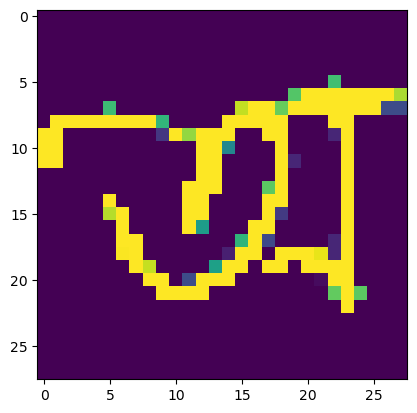

In [38]:
img=X_test[1,:784].reshape((28,28))

plt.imshow(img)


# Logistic Regression

In [13]:
logistic_clf=LogisticRegression(penalty="l2",C=0.3,solver='newton-cg',max_iter=400,multi_class='multinomial')
logistic_clf.fit(X_train,y_train)
bangla_predict_log=logistic_clf.predict(X_test)

accuracy=accuracy_score(y_test,bangla_predict_log)
print(f"Accuracy for Bangla isolated test data set by Logistic with multiclass is {accuracy}")
### Confusion matrix ####
cf=confusion_matrix(y_test,bangla_predict_log)
df_cf=pd.DataFrame(cf)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/log_conf_matrix_bangla.csv')

Accuracy for Bangla isolated test data set by Logistic with multiclass is 0.43282287353397025


In [43]:
cf_log=confusion_matrix(y_test,bangla_predict_log)

recall_log=np.diag(cf_log)/np.sum(cf_log,axis=1)
precision_log=np.diag(cf_log)/np.sum(cf_log,axis=0)

print(f'total recall:{recall_log}, and \n precision:{precision_log}')

total recall:[0.47510017 0.53052503 0.55800389 0.63915547 0.33499377 0.48165965
 0.47445255 0.62712826 0.64182553 0.49541284 0.74680135 0.42736009
 0.26219909 0.31335616 0.32415519 0.38358779 0.31048387 0.37064343
 0.2631288  0.29974026 0.66744457 0.56895619 0.57683742 0.27930306
 0.55414686 0.51753882 0.49283059 0.3960084  0.24930748 0.33662791
 0.15865119 0.16868862 0.50688863 0.22786238 0.23343465 0.20288184
 0.35824176 0.2308114  0.52361028 0.71020143 0.18355856 0.1720297
 0.44947543 0.43938462 0.3837807  0.36836518 0.68237251 0.42973287
 0.86451613 0.7966759 ], and 
 precision:[0.30763529 0.41400667 0.41058655 0.49925037 0.32448733 0.34978166
 0.48148148 0.59472551 0.44333599 0.68192581 0.38533704 0.61563518
 0.33278282 0.35305466 0.25231369 0.60420842 0.53313551 0.41925701
 0.4516129  0.55802708 0.61340483 0.37950938 0.38991344 0.36659737
 0.4580786  0.45294414 0.40953222 0.3721619  0.56603774 0.38142292
 0.51158645 0.52802893 0.56170483 0.51269036 0.36432638 0.2980525
 0.3343589

# Random Forest

Accuracy score for Bangla isolated with random forest trained on Ekush data is 0.5174188623377826(n_estimators:380)

In [31]:
random_forest_clf=RandomForestClassifier(n_estimators=400,min_samples_split=5)
random_forest_clf.fit(X_train,y_train)
bangla_predict_rf=random_forest_clf.predict(X_test)
accuracy=accuracy_score(y_test,bangla_predict_rf)
print(f'Accuracy score for Bangla isolated with random forest trained on Ekush data is{accuracy}')
### Confusion matrix ####
cf=confusion_matrix(y_test,bangla_predict_rf)
df_cf=pd.DataFrame(cf)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/rf_conf_matrix_bangla.csv')

Accuracy score for Bangla isolated with random forest trained on Ekush data is0.5165166901848296


In [42]:
cf_rf=confusion_matrix(y_test,bangla_predict_rf)

recall_rf=np.diag(cf_rf)/np.sum(cf_rf,axis=1)
precision_rf=np.diag(cf_rf)/np.sum(cf_rf,axis=0)

print(f'total recall:{recall_rf}, and \n precision:{precision_rf}')

total recall:[0.4241557  0.78632479 0.6066105  0.43634037 0.25217933 0.23211064
 0.52737226 0.67990919 0.53206239 0.38130734 0.64175084 0.40814019
 0.44437215 0.42922374 0.27033792 0.42239186 0.50806452 0.43900804
 0.33996683 0.50701299 0.76371062 0.6430503  0.62360802 0.34213305
 0.59006867 0.81138585 0.5220393  0.6144958  0.67922438 0.40813953
 0.40630182 0.49682265 0.56142365 0.53807107 0.2893617  0.24495677
 0.4        0.38980263 0.59653317 0.58349578 0.24943694 0.21101485
 0.46162341 0.58769231 0.59623073 0.44798301 0.82594235 0.7485482
 0.93387097 0.89584488], and 
 precision:[0.65983972 0.52960526 0.52941176 0.78211009 0.44069641 0.78137652
 0.65831435 0.58268482 0.55750605 0.87155963 0.420194   0.82798165
 0.48542999 0.45797808 0.63343109 0.73127753 0.63728324 0.54447215
 0.51898734 0.53596925 0.65124378 0.49686586 0.39957189 0.62427746
 0.53961353 0.43738376 0.63707064 0.47833197 0.24559295 0.63934426
 0.73207171 0.66718386 0.63547758 0.70405904 0.56599287 0.45068929
 0.449660

## Naïve Bayes classifier

Bayes classifier(Multinomial,alpha=30) accuracy on Bangla Lekha isolated is:0.38043905711443704

In [30]:
bayes_clf=MultinomialNB(alpha = 30)
bayes_clf.fit(X_train,y_train)
bayes_prediction=bayes_clf.predict(X_test)
bayes_accuracy=accuracy_score(y_test,bayes_prediction)
print(f'Bayes classifier accuracy on Bangla Lekha isolated is:{bayes_accuracy}')

Bayes classifier accuracy on Bangla Lekha isolated is:0.38043905711443704


In [44]:
cf_bayes=confusion_matrix(y_test,bayes_prediction)

recall_bayes=np.diag(cf_bayes)/np.sum(cf_bayes,axis=1)
precision_bayes=np.diag(cf_bayes)/np.sum(cf_bayes,axis=0)

print(f'total recall:{recall_bayes}, and \n precision:{precision_bayes}')

total recall:[0.2501431  0.72954823 0.52819183 0.4600128  0.30323786 0.4539988
 0.39172749 0.65664018 0.63258232 0.63990826 0.68350168 0.26229508
 0.40988939 0.23515982 0.13579474 0.33142494 0.21889401 0.29825737
 0.26091763 0.27636364 0.6756126  0.45754462 0.57071269 0.18321014
 0.29741152 0.60609546 0.22782793 0.41596639 0.32576177 0.30116279
 0.19347706 0.22068169 0.37657865 0.17710096 0.08449848 0.04841499
 0.12527473 0.21162281 0.34608488 0.44574399 0.0884009  0.06188119
 0.32578686 0.48615385 0.64306111 0.24416136 0.73558758 0.49593496
 0.9        0.65484765], and 
 precision:[0.25100517 0.20782609 0.41816316 0.6340388  0.37175573 0.4143798
 0.44972067 0.50991626 0.42294322 0.44023669 0.38043478 0.43283582
 0.25372533 0.2312009  0.22770199 0.50978474 0.40254237 0.30292716
 0.55594817 0.19047619 0.59021407 0.3977433  0.40275049 0.40208575
 0.35610373 0.34591401 0.41131352 0.20582121 0.32414553 0.37920937
 0.34381139 0.3975026  0.4852071  0.35241302 0.37265416 0.14608696
 0.2430703

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Instantiate the decision tree classifier
tree_clf = DecisionTreeClassifier()

# Instantiate the grid search
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Use the best parameters to train the model
best_tree_clf = grid_search.best_estimator_
best_tree_clf.fit(X_train, y_train)

# Make predictions on the test data
best_tree_prediction = best_tree_clf.predict(X_test)

# Calculate accuracy
best_tree_accuracy = accuracy_score(y_test, best_tree_prediction)

print(f'Best Decision Tree classifier accuracy on Bangla Lekha isolated is: {best_tree_accuracy}')



Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.34318103789161963
Best Decision Tree classifier accuracy on Bangla Lekha isolated is: 0.20789284970737237


In [7]:

# Define the hyperparameters grid
param_grid = {

    'min_samples_split': [12,15,20],   # Minimum number of samples required to split a node
    'min_samples_leaf': [5,7,10,12]      # Minimum number of samples required at each leaf node
}

# Instantiate the decision tree classifier
tree_clf = DecisionTreeClassifier()

# Instantiate the grid search
grid_search = GridSearchCV(tree_clf, param_grid, cv=4, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Use the best parameters to train the model
best_tree_clf = grid_search.best_estimator_
best_tree_clf.fit(X_train, y_train)

# Make predictions on the test data
best_tree_prediction = best_tree_clf.predict(X_test)

# Calculate accuracy
best_tree_accuracy = accuracy_score(y_test, best_tree_prediction)

print(f'Best Decision Tree classifier accuracy on Bangla Lekha isolated is: {best_tree_accuracy}')



Best parameters: {'min_samples_leaf': 12, 'min_samples_split': 12}
Best cross-validation score: 0.3529573141966069
Best Decision Tree classifier accuracy on Bangla Lekha isolated is: 0.21945915936061441


Checking whether there is any difference between cross and holdout validation.

In [45]:
X_train1,X_val1,y_train1,y_val1=train_test_split(ekush[:,:784],ekush[:,-1],test_size=0.2,random_state=42)


In [46]:

tree_clf1 = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=5)
tree_clf1.fit(X_train1,y_train1)
pred1=tree_clf1.predict(X_val1)
tree_clf1_accuracy=accuracy_score(y_val1,pred1)

print(f"tree1 hold out validation accuracy is:{tree_clf1_accuracy}")

tree1 hold out validation accuracy is:0.3458769962168134


In [9]:
min_samples_leaf_ls=np.arange(5,50,2)
min_samples_split_ls=np.arange(10,25)

for i in min_samples_leaf_ls:
    for j in min_samples_split_ls:
        tree_clf=DecisionTreeClassifier(min_samples_leaf=i,min_samples_split=j)
        tree_clf.fit(X_train1,y_train1)
        pred=tree_clf.predict(X_val1)
        tree_clf_accuracy=accuracy_score(y_val1,pred)

        print(f"tree1 hold out validation accuracy is:{tree_clf_accuracy} with min sample leaf:{i} and min sample split:{j}")

tree1 hold out validation accuracy is:0.3475509725802672 with min sample leaf:5 and min sample split:10
tree1 hold out validation accuracy is:0.3468479025076166 with min sample leaf:5 and min sample split:11
tree1 hold out validation accuracy is:0.3475509725802672 with min sample leaf:5 and min sample split:12
tree1 hold out validation accuracy is:0.34691486156215473 with min sample leaf:5 and min sample split:13
tree1 hold out validation accuracy is:0.3477853292711507 with min sample leaf:5 and min sample split:14
tree1 hold out validation accuracy is:0.3490910308346446 with min sample leaf:5 and min sample split:15
tree1 hold out validation accuracy is:0.3505641300344839 with min sample leaf:5 and min sample split:16
tree1 hold out validation accuracy is:0.3506310890890221 with min sample leaf:5 and min sample split:17
tree1 hold out validation accuracy is:0.3520037497070541 with min sample leaf:5 and min sample split:18
tree1 hold out validation accuracy is:0.35210418828886136 with 

Fitting and testing on whole dataset using decision tree with best parameters.

Average Recall: 0.2041604028

Average Precision: 0.2329336703

Average F1 Score: 0.2164871008

In [47]:
tree_clf=DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=14)

tree_clf.fit(X_train,y_train)
dt_pred=tree_clf.predict(X_test)
tree_clf_accuracy=accuracy_score(y_test,dt_pred)

print(f"tree acuuracy on bangla isolated is:{tree_clf_accuracy} with min sample leaf:12 and min sample split:14")

cf_dt=confusion_matrix(y_test,dt_pred)

recall_dt=np.diag(cf_dt)/np.sum(cf_dt,axis=1)
precision_dt=np.diag(cf_dt)/np.sum(cf_dt,axis=0)

print(f'total recall:{recall_dt}, and \n precision:{precision_dt}')

df_cf=pd.DataFrame(cf_dt)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/dt_conf_matrix_bangla.csv')

tree acuuracy on bangla isolated is:0.2412 with min sample leaf:12 and min sample split:14
total recall:[0.2  0.2  0.2  0.12 0.22 0.12 0.2  0.22 0.22 0.04 0.26 0.2  0.1  0.44
 0.08 0.12 0.16 0.2  0.12 0.24 0.36 0.36 0.32 0.16 0.2  0.38 0.22 0.2
 0.22 0.14 0.08 0.2  0.18 0.3  0.16 0.08 0.24 0.2  0.12 0.28 0.2  0.14
 0.24 0.18 0.34 0.22 0.52 0.7  0.68 0.78], and 
 precision:[0.28571429 0.17857143 0.22727273 0.2        0.14285714 0.375
 0.3030303  0.39285714 0.28947368 0.14285714 0.2826087  0.29411765
 0.2        0.43137255 0.10810811 0.42857143 0.32       0.23809524
 0.05940594 0.24       0.72       0.2278481  0.27118644 0.27586207
 0.28571429 0.36538462 0.34375    0.21276596 0.15277778 0.15909091
 0.14285714 0.15873016 0.23076923 0.3125     0.19512195 0.12121212
 0.21818182 0.21276596 0.09836066 0.22222222 0.14925373 0.175
 0.20689655 0.19565217 0.34693878 0.2244898  0.26530612 0.39325843
 0.425      0.22159091]


Now we will be using knn for holdout validation and then the best estimator would be used cross valiadtion to get an idea of average performence.Atlast we will test on the test set.

In [19]:
X_train1.shape

(119472, 784)

Knn with euclidean distance.

In [20]:

parameters=[3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51]

best_accuracy = 0
best_params = None

# Iterate over each set of parameters
for params in parameters:
    # Train k-NN model
    knn = KNeighborsClassifier(params,metric='euclidean')
    knn.fit(X_train1, y_train1)
    
    # Validate
    y_pred = knn.predict(X_val1)
    accuracy = accuracy_score(y_val1, y_pred)
    
    # Check if current parameters are the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: 7
Best accuracy: 0.639124175566641


In [21]:
parameters=[7,53,55,57,59,61,63,65,67]

best_accuracy = 0
best_params = None

# Iterate over each set of parameters
for params in parameters:
    # Train k-NN model
    knn = KNeighborsClassifier(params,metric='euclidean')
    knn.fit(X_train1, y_train1)
    
    # Validate
    y_pred = knn.predict(X_val1)
    accuracy = accuracy_score(y_val1, y_pred)
    
    # Check if current parameters are the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: 7
Best accuracy: 0.639124175566641


Now we are testing on the whole bangla isolated.

In [8]:
X_train,y_train=ekush[:,:784],ekush[:,-1]
X_test,y_test=bangla_isolated[:,:784],bangla_isolated[:,-1]
print(f'Training data set shape are: {X_train.shape} and {y_train.shape}\n Test dataset shapes are: {X_test.shape} and {y_test.shape} ')

Training data set shape are: (149341, 784) and (149341,)
 Test dataset shapes are: (86458, 784) and (86458,) 


Average Recall: 0.5761391066
Average Precision: 0.6155154294
Average F1 Score: 0.5811765956

In [23]:
knn = KNeighborsClassifier(best_params,metric='euclidean')
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

cf_knn=confusion_matrix(y_test,knn_pred)

recall_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=1)
precision_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=0)

print(f'total recall:{recall_knn}, and \n precision:{precision_knn}')

total recall:[0.54607899 0.62942613 0.5845755  0.37236084 0.48069738 0.24834636
 0.49756691 0.83484677 0.53206239 0.77580275 0.67474747 0.55568118
 0.39947951 0.49315068 0.47809762 0.66857506 0.65956221 0.58780161
 0.37755666 0.56727273 0.67444574 0.65062196 0.62694878 0.5654699
 0.7078711  0.85278896 0.58417419 0.68434874 0.74238227 0.50465116
 0.66058596 0.55343732 0.44718714 0.73998872 0.29969605 0.20979827
 0.47967033 0.5745614  0.57441721 0.49187784 0.21565315 0.22029703
 0.62893429 0.64861538 0.75328384 0.53397028 0.86696231 0.80545877
 0.92365591 0.97063712], and 
 precision:[0.68142857 0.81825397 0.61444142 0.8422576  0.52303523 0.74818841
 0.88624052 0.62330508 0.81073944 0.78253326 0.84130982 0.69274137
 0.52794497 0.48349189 0.41725833 0.85032362 0.46113572 0.77610619
 0.82989064 0.62151394 0.94754098 0.6527401  0.69122161 0.45458404
 0.46414964 0.43185789 0.64705882 0.48655713 0.44385558 0.82352941
 0.47685555 0.68282252 0.86267996 0.42680547 0.6139477  0.45105328
 0.328937

In [25]:
print(f'knn accuracy on bangla isolated is:{knn_accuracy} with 7 nearest neighbours.')

knn accuracy on bangla isolated is:0.5864118994193712 with 7 nearest neighbours.


In [24]:
df_cf=pd.DataFrame(cf_knn)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/knn_conf_matrix_bangla.csv')

Knn with taxi-cab metric.Checking the best parameter on validation.

In [26]:
parameters=[3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63]

best_accuracy = 0
best_params_manhattan = None

# Iterate over each set of parameters
for params in parameters:
    # Train k-NN model
    knn = KNeighborsClassifier(params,metric='manhattan')
    knn.fit(X_train1, y_train1)
    
    # Validate
    y_pred = knn.predict(X_val1)
    accuracy = accuracy_score(y_val1, y_pred)
    
    # Check if current parameters are the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params_manhattan = params

print("Best parameters:", best_params_manhattan)
print("Best accuracy:", best_accuracy)

Best parameters: 7
Best accuracy: 0.5887709665539522


Average Recall: 0.4771483574
Average Precision: 0.6192991648
Average F1 Score: 0.5386676201

In [7]:
best_params_manhattan=7
knn = KNeighborsClassifier(best_params_manhattan,metric='manhattan')
knn.fit(X_train, y_train)

knn_man = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_man)

cf_knn=confusion_matrix(y_test,knn_man)

recall_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=1)
precision_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=0)

print(f'knn accuracy on bangla isolated is:{knn_accuracy} with 7 nearest neighbours.')
print(f'total recall:{recall_knn}, and \n precision:{precision_knn}')

df_cf=pd.DataFrame(cf_knn)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/knn_man_conf_matrix_bangla.csv')

knn accuracy on bangla isolated is:0.5053436350597978 with 7 nearest neighbours.
total recall:[0.43846594 0.51159951 0.40764744 0.22136916 0.30386052 0.15634396
 0.41058394 0.77014756 0.35932987 0.68176606 0.47205387 0.43470888
 0.37085231 0.42579909 0.42428035 0.57760814 0.63191244 0.47654155
 0.25981205 0.50441558 0.56417736 0.50081125 0.50445434 0.5095037
 0.66825145 0.83841288 0.5252257  0.6092437  0.69307479 0.41744186
 0.6053068  0.51993068 0.36280138 0.69317541 0.25775076 0.1815562
 0.46318681 0.47368421 0.50926479 0.41455491 0.17623874 0.17388614
 0.54555494 0.51753846 0.66019417 0.43842887 0.80432373 0.70557491
 0.9016129  0.97229917], and 
 precision:[0.66666667 0.82156863 0.59961868 0.85221675 0.52871073 0.78549849
 0.90847914 0.61264108 0.73696682 0.80774457 0.8654321  0.70550459
 0.54545455 0.48253558 0.40165877 0.81508079 0.43583631 0.76616379
 0.7925801  0.61030798 0.94066148 0.64709993 0.72133758 0.41847355
 0.3995578  0.39004815 0.63519589 0.50434783 0.32748691 0.79424

Now we will train on ekush and then test on our own collected primary data.

In [4]:
#Loading the training set.
X_train,y_train=ekush[:,:784],ekush[:,-1]

In [6]:
#Loading the primary test dataset.
primary_data_path='/home/sysadm/z/ML_P1/Data_npy_files/primary_data(fab).npy'
primary_data=np.load(primary_data_path).astype('float16')
primary_data.shape

X_test,y_test=primary_data[:,:784],primary_data[:,-1]

In [8]:
X_test.shape

(2500, 784)

Applying SVM kernel=poly for training on ekush and test on primary dataset

In [5]:
#Training on ekush
svm_poly_classifier=SVC(kernel='poly')
svm_poly_classifier.fit(X_train,y_train)

SVC(kernel='poly')

In [9]:
#Testing on primary dataset
svm_poly_prediction=svm_poly_classifier.predict(X_test)

svm_poly_accuracy=accuracy_score(y_test,svm_poly_prediction)
print(f"SVM poly accuracy on primary dataset with strength=1 is :{svm_poly_accuracy}")

SVM poly accuracy on primary dataset with strength=1 is :0.868


In [10]:
#Creating confusion matrix

cf_svm_poly=confusion_matrix(y_test,svm_poly_prediction)
df_cf=pd.DataFrame(cf_svm_poly)
recall_poly=np.diag(cf_svm_poly)/np.sum(cf_svm_poly,axis=1)
precision_poly=np.diag(cf_svm_poly)/np.sum(cf_svm_poly,axis=0)

df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/SVM_poly_conf_mat_primary.csv')

print(f'total average recall:{recall_poly}, and \n precision:{precision_poly}')

total average recall:[0.86 0.84 0.96 0.78 0.74 0.84 0.82 0.68 0.94 0.6  0.98 0.8  0.6  0.88
 0.82 0.8  0.94 0.74 0.88 0.92 0.98 0.98 0.9  0.84 0.88 0.98 0.9  0.9
 0.96 0.92 0.86 0.88 0.82 0.96 0.76 0.58 0.88 0.92 0.88 0.96 0.68 0.86
 0.98 0.86 0.9  0.98 1.   0.98 1.   1.  ], and 
 precision:[0.95555556 0.875      0.92307692 1.         0.86046512 0.91304348
 0.93181818 0.94444444 0.90384615 0.96774194 0.875      0.93023256
 0.85714286 0.88       0.85416667 0.97560976 0.92156863 0.94871795
 0.83018868 0.88461538 0.96078431 0.74242424 0.91836735 0.82352941
 0.95652174 0.80327869 0.76271186 0.76271186 0.71641791 1.
 0.87755102 0.93617021 0.93181818 0.94117647 0.86363636 0.96666667
 0.72131148 0.93877551 0.89795918 0.88888889 0.77272727 0.55128205
 0.94230769 0.89583333 0.9375     0.90740741 0.96153846 0.765625
 0.98039216 0.69444444]


Applying SVM kernel=rbf for training on ekush and test on primary dataset

In [11]:
#Training on ekush using svm rbf kernel.
svm_rbf_classifier=SVC(kernel='rbf')
svm_rbf_classifier.fit(X_train,y_train)


SVC()

In [12]:
#Testing on primary dataset.
svm_rbf_predict=svm_rbf_classifier.predict(X_test)
svm_rbf_accuracy=accuracy_score(y_test,svm_rbf_predict)

print(f"On primary data SVM with kernel =rbf and c=1 gives test accuracy:{svm_rbf_accuracy} ")


On primary data SVM with kernel =rbf and c=1 gives test accuracy:0.8812 


In [14]:
#Creating confusion matrix of svm with rbf kernel.
cf_svm_rbf=confusion_matrix(y_test,svm_rbf_predict)

df_cf=pd.DataFrame(cf_svm_rbf)
recall_rbf=np.diag(cf_svm_rbf)/np.sum(cf_svm_rbf,axis=1)
precision_rbf=np.diag(cf_svm_rbf)/np.sum(cf_svm_rbf,axis=0)

print(f'total recall:{recall_rbf}, and \n precision:{precision_rbf}')
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/SVM_rbf_conf_mat_primary.csv')


total recall:[0.88 0.88 0.96 0.82 0.76 0.9  0.9  0.86 0.98 0.72 0.98 0.84 0.58 0.82
 0.82 0.88 0.9  0.76 0.84 0.9  0.98 0.98 0.9  0.8  0.9  0.94 0.96 0.9
 0.92 0.94 0.84 0.86 0.82 0.94 0.78 0.7  0.94 0.9  0.88 0.98 0.78 0.8
 0.96 0.9  0.88 0.98 1.   0.94 1.   0.98], and 
 precision:[0.91666667 0.8627451  0.90566038 0.97619048 0.88372093 0.88235294
 0.95744681 0.91489362 0.83050847 0.97297297 0.85964912 0.93333333
 0.80555556 0.89130435 0.89130435 0.89795918 0.95744681 0.92682927
 0.84       0.83333333 0.9245283  0.79032258 0.91836735 0.85106383
 0.86538462 0.8245614  0.81355932 0.68181818 0.86792453 0.92156863
 0.91304348 0.87755102 0.93181818 0.88679245 0.82978723 0.92105263
 0.79661017 0.9        0.81481481 0.75384615 0.86666667 0.75471698
 0.94117647 0.9375     0.97777778 0.9245283  0.94339623 0.97916667
 0.98039216 0.98      ]


Now we will fit using knn(nn=7,metric=euclidean) in ekush and then test on primary dataset.

In [15]:
knn = KNeighborsClassifier(7,metric='euclidean')
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

cf_knn=confusion_matrix(y_test,knn_pred)

recall_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=1)
precision_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=0)

print(f'knn accuracy with euclidean metric on primary dataset is:{knn_accuracy} with 7 nearest neighbours.')
print(f'total recall:{recall_knn}, and \n precision:{precision_knn}')


knn accuracy with euclidean metric on primary dataset is:0.698 with 7 nearest neighbours.
total recall:[0.68 0.64 0.62 0.36 0.58 0.32 0.48 0.7  0.66 0.64 0.76 0.62 0.44 0.58
 0.6  0.72 0.88 0.7  0.54 0.82 0.88 0.9  0.82 0.74 0.84 0.92 0.88 0.8
 0.9  0.74 0.76 0.82 0.44 0.84 0.34 0.36 0.7  0.74 0.54 0.68 0.3  0.36
 0.8  0.8  0.9  0.78 1.   1.   1.   0.98], and 
 precision:[0.82926829 0.84210526 0.83783784 0.9        0.60416667 0.88888889
 0.96       0.67307692 0.94285714 0.94117647 1.         0.70454545
 0.61111111 0.70731707 0.56603774 1.         0.72131148 0.83333333
 0.87096774 0.5942029  0.97777778 0.72580645 0.85416667 0.51388889
 0.63636364 0.50549451 0.65671642 0.59701493 0.48387097 0.97368421
 0.56716418 0.80392157 0.95652174 0.48837209 0.77272727 0.51428571
 0.35714286 0.90243902 0.77142857 0.97142857 0.39473684 0.62068966
 0.6557377  0.85106383 0.77586207 0.73584906 0.87719298 0.81967213
 0.79365079 0.5326087 ]


In [16]:
df_cf=pd.DataFrame(cf_knn)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/knn_conf_euclid_primary.csv')

Now we will fit using knn(nn=7,metric=manhattan) in ekush and then test on primary dataset.

In [17]:
knn = KNeighborsClassifier(7,metric='manhattan')
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

cf_knn=confusion_matrix(y_test,knn_pred)

recall_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=1)
precision_knn=np.diag(cf_knn)/np.sum(cf_knn,axis=0)

print(f'knn accuracy with manhattan metric on primary dataset is:{knn_accuracy} with 7 nearest neighbours.')
print(f'total recall:{recall_knn}, and \n precision:{precision_knn}')


knn accuracy with manhattan metric on primary dataset is:0.6204 with 7 nearest neighbours.
total recall:[0.6  0.54 0.38 0.14 0.32 0.2  0.4  0.6  0.36 0.5  0.6  0.52 0.46 0.58
 0.58 0.56 0.76 0.56 0.46 0.76 0.72 0.78 0.64 0.7  0.8  0.98 0.82 0.72
 0.86 0.7  0.74 0.76 0.42 0.84 0.42 0.28 0.76 0.62 0.52 0.6  0.2  0.36
 0.76 0.66 0.86 0.72 0.98 0.94 1.   0.98], and 
 precision:[0.81081081 0.79411765 0.76       0.7        0.64       1.
 1.         0.68181818 0.85714286 0.89285714 1.         0.78787879
 0.67647059 0.70731707 0.65909091 0.90322581 0.63333333 0.93333333
 0.88461538 0.62295082 0.94736842 0.76470588 0.88888889 0.53846154
 0.47619048 0.49       0.67213115 0.53731343 0.38392857 0.97222222
 0.53623188 0.88372093 0.875      0.46666667 0.875      0.48275862
 0.36190476 0.775      0.72222222 0.9375     0.23255814 0.5625
 0.62295082 0.76744186 0.71666667 0.72       0.69014085 0.74603175
 0.625      0.23222749]


In [18]:
df_cf=pd.DataFrame(cf_knn)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/knn_conf_manhattan_primary.csv')

Now we will fit using decision tree and then test on primary dataset.

In [40]:
#tree_clf = DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=14)
tree_clf = DecisionTreeClassifier(criterion='gini',  # Similar to Random Forest
                                       splitter='best',  # Default behavior of Random Forest
                                       max_depth=None,  # Default value of Random Forest
                                       min_samples_split=5,  # Default value of Random Forest
                                       min_samples_leaf=5,  # Default value of Random Forest
                                       min_weight_fraction_leaf=0.0,  # Default value of Random Forest
                                       max_features=None,  # Default value of Random Forest
                                       max_leaf_nodes=None,  # Default value of Random Forest
                                       min_impurity_decrease=0.0)  # Default value of Random Forest

tree_clf.fit(X_train,y_train)
tree_pred=tree_clf.predict(X_test)
tree_clf_accuracy=accuracy_score(y_test,tree_pred)

cf_tree=confusion_matrix(y_test,tree_pred)

recall_tree=np.diag(cf_tree)/np.sum(cf_tree,axis=1)
precision_tree=np.diag(cf_tree)/np.sum(cf_tree,axis=0)

print(f"decision tree accuracy with on primary data set is:{tree_clf_accuracy}")
print(f'total recall:{recall_tree}, and \n precision:{precision_tree}')



decision tree accuracy with on primary data set is:0.2548
total recall:[0.24 0.2  0.3  0.1  0.1  0.14 0.26 0.26 0.3  0.02 0.46 0.28 0.16 0.38
 0.14 0.16 0.2  0.22 0.08 0.22 0.4  0.34 0.4  0.26 0.18 0.3  0.3  0.22
 0.18 0.16 0.1  0.22 0.18 0.26 0.1  0.08 0.14 0.2  0.14 0.28 0.18 0.12
 0.38 0.28 0.36 0.24 0.46 0.52 0.74 0.8 ], and 
 precision:[0.20689655 0.19230769 0.25423729 0.15151515 0.11111111 0.33333333
 0.37142857 0.27083333 0.31914894 0.09090909 0.34328358 0.3255814
 0.16326531 0.33333333 0.14       0.61538462 0.26315789 0.21568627
 0.1025641  0.2037037  0.71428571 0.22368421 0.28571429 0.19402985
 0.24324324 0.28846154 0.3125     0.25       0.15       0.18604651
 0.13157895 0.30555556 0.16363636 0.34210526 0.33333333 0.11428571
 0.18918919 0.20408163 0.09722222 0.20895522 0.14516129 0.11764706
 0.32758621 0.23333333 0.31578947 0.21428571 0.359375   0.37142857
 0.52112676 0.35087719]


In [41]:
df_cf=pd.DataFrame(cf_tree)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/tree_conf_primary.csv')

Now we will fit using random forest and then test on primary data.

In [37]:
print("Number of trees:", random_forest_clf.n_estimators)
print("Criterion:", random_forest_clf.criterion)
print("Max depth:", random_forest_clf.max_depth)
print("Min samples split:", random_forest_clf.min_samples_split)
print("Min samples leaf:", random_forest_clf.min_samples_leaf)
print("Min weight fraction leaf:", random_forest_clf.min_weight_fraction_leaf)
print("Max features:", random_forest_clf.max_features)
print("Max leaf nodes:", random_forest_clf.max_leaf_nodes)

Number of trees: 380
Criterion: gini
Max depth: None
Min samples split: 5
Min samples leaf: 1
Min weight fraction leaf: 0.0
Max features: sqrt
Max leaf nodes: None


In [38]:
random_forest_clf=RandomForestClassifier(n_estimators=380,min_samples_split=5)
random_forest_clf.fit(X_train,y_train)
rf_pred=random_forest_clf.predict(X_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
print(f'Accuracy score on primary dataset with random forest trained on Ekush data is{rf_accuracy}')
### Confusion matrix ####

cf_rf=confusion_matrix(y_test,rf_pred)
recall_rf=np.diag(cf_rf)/np.sum(cf_rf,axis=1)
precision_rf=np.diag(cf_rf)/np.sum(cf_rf,axis=0)

print(f'total recall:{recall_rf}, and \n precision:{precision_rf}')


Accuracy score on primary dataset with random forest trained on Ekush data is0.6336
total recall:[0.6  0.78 0.76 0.38 0.24 0.26 0.68 0.42 0.72 0.08 0.82 0.44 0.52 0.52
 0.48 0.28 0.52 0.5  0.34 0.86 0.96 0.88 0.78 0.62 0.78 0.92 0.78 0.78
 0.92 0.6  0.5  0.68 0.68 0.8  0.36 0.36 0.6  0.58 0.64 0.74 0.36 0.4
 0.66 0.74 0.76 0.76 0.96 0.9  1.   0.98], and 
 precision:[0.85714286 0.68421053 0.63333333 0.82608696 0.48       0.92857143
 0.82926829 0.7        0.8        0.8        0.50617284 0.88
 0.7027027  0.63414634 0.77419355 0.73684211 0.72222222 0.86206897
 0.68       0.58108108 0.84210526 0.57142857 0.67241379 0.70454545
 0.61904762 0.54117647 0.65       0.54166667 0.26285714 0.81081081
 0.86206897 0.77272727 0.79069767 0.86956522 0.75       0.51428571
 0.50847458 0.87878788 0.84210526 0.74       0.36734694 0.64516129
 0.73333333 0.67272727 0.7755102  0.69090909 0.55172414 0.50561798
 0.61728395 0.50515464]


In [22]:
df_cf=pd.DataFrame(cf_rf)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/rf_conf_primary.csv')

Now we will fit using bayes and then test on primary dataset.

In [23]:
bayes_clf=GaussianNB()

bayes_clf.fit(X_train,y_train)

bayes_prediction=bayes_clf.predict(X_test)

bayes_accuracy=accuracy_score(y_test,bayes_prediction)

print(f"Bayes Classifier accuracy on primary dataset is :{bayes_accuracy}")

cf_bayes=confusion_matrix(y_test,bayes_prediction)

recall_bayes=np.diag(cf_bayes)/np.sum(cf_bayes,axis=1)
precision_bayes=np.diag(cf_bayes)/np.sum(cf_bayes,axis=0)

print(f'total recall:{recall_bayes}, and \n precision:{precision_bayes}')

Bayes Classifier accuracy on primary dataset is :0.1756
total recall:[0.1  0.96 0.76 0.14 0.18 0.28 0.08 0.02 0.5  0.   0.78 0.04 0.   0.02
 0.06 0.02 0.02 0.2  0.04 0.   0.2  0.82 0.48 0.   0.5  0.3  0.2  0.02
 0.1  0.4  0.   0.   0.04 0.   0.   0.   0.08 0.   0.06 0.22 0.   0.
 0.   0.04 0.24 0.02 0.6  0.   0.16 0.1 ], and 
 precision:[0.02427184 0.05769231 0.28787879 0.25       0.21428571 0.34146341
 0.28571429 0.16666667 0.34246575 0.         0.35454545 0.28571429
 0.         0.5        0.13636364 0.33333333 1.         0.41666667
 0.66666667 0.         0.47619048 0.21693122 0.375             nan
 0.17605634 0.57692308 0.08196721 0.16666667 0.55555556 0.47619048
        nan        nan 0.25              nan        nan 0.
 0.15384615        nan 0.05084746 0.10784314 0.                nan
        nan 0.5        0.46153846 0.05       0.58823529 0.
 0.8        0.83333333]


/tmp/ipykernel_4451/3196410475.py:14: RuntimeWarning: invalid value encountered in divide
  precision_bayes=np.diag(cf_bayes)/np.sum(cf_bayes,axis=0)


In [26]:
df_cf=pd.DataFrame(cf_bayes)

df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/bayes_gauss_conf_primary.csv')

Multinomial bayes

In [42]:
bayes_clf=MultinomialNB(alpha = 30)
bayes_clf.fit(X_train,y_train)
bayes_pred_mult=bayes_clf.predict(X_test)
bayes_mult_accuracy=accuracy_score(y_test,bayes_pred_mult)
print(f'Bayes classifier accuracy on Bangla Lekha isolated is:{bayes_mult_accuracy}')

cf_bayes=confusion_matrix(y_test,bayes_pred_mult)

recall_bayes_mult=np.diag(cf_bayes)/np.sum(cf_bayes,axis=1)
precision_bayes_mult=np.diag(cf_bayes)/np.sum(cf_bayes,axis=0)

print(f'total recall:{recall_bayes_mult}, and \n precision:{precision_bayes_mult}')

Bayes classifier accuracy on Bangla Lekha isolated is:0.4728
total recall:[0.34 0.88 0.76 0.42 0.42 0.54 0.4  0.5  0.78 0.5  0.9  0.18 0.46 0.22
 0.1  0.36 0.28 0.38 0.18 0.46 0.86 0.64 0.8  0.22 0.38 0.76 0.22 0.5
 0.54 0.64 0.18 0.4  0.58 0.2  0.12 0.08 0.22 0.4  0.12 0.56 0.1  0.16
 0.58 0.54 0.82 0.38 0.96 0.72 0.98 0.92], and 
 precision:[0.27868852 0.21890547 0.48717949 0.77777778 0.65625    0.71052632
 0.66666667 0.69444444 0.69642857 0.54347826 0.56962025 0.25714286
 0.30666667 0.35483871 0.5        0.66666667 0.48275862 0.44186047
 0.69230769 0.15646259 0.76785714 0.64       0.6557377  0.5
 0.43181818 0.42696629 0.35483871 0.17482517 0.46551724 0.7804878
 0.75       0.51282051 0.53703704 0.47619048 0.5        0.16666667
 0.35483871 0.52631579 0.46153846 0.29473684 0.26315789 0.88888889
 0.42647059 0.6        0.53947368 0.43181818 0.8        0.81818182
 0.85964912 0.92      ]


In [43]:
df_cf=pd.DataFrame(cf_bayes)

df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/bayes_mult_conf_primary.csv')

Now we will fit using logistic regression and then test on primary dataset.(softmax i.e multinomial logistic.)

In [27]:
logistic_clf=LogisticRegression(penalty="l2",C=0.3,solver='newton-cg',max_iter=400,multi_class='multinomial')
logistic_clf.fit(X_train,y_train)
log_pred=logistic_clf.predict(X_test)

log_accuracy=accuracy_score(y_test,log_pred)
print(f"Accuracy on primary data using Logistic with multiclass is {log_accuracy}")
### Confusion matrix ####
cf_log=confusion_matrix(y_test,log_pred)
recall_log=np.diag(cf_log)/np.sum(cf_log,axis=1)
precision_log=np.diag(cf_log)/np.sum(cf_log,axis=0)

print(f'total recall:{recall_log}, and \n precision:{precision_log}')

Accuracy on primary data using Logistic with multiclass is 0.5568
total recall:[0.66 0.5  0.68 0.64 0.42 0.58 0.38 0.56 0.8  0.34 0.82 0.54 0.24 0.46
 0.52 0.34 0.44 0.4  0.36 0.5  0.8  0.8  0.78 0.4  0.76 0.68 0.7  0.5
 0.48 0.56 0.2  0.24 0.66 0.26 0.38 0.24 0.58 0.52 0.56 0.82 0.38 0.44
 0.68 0.6  0.58 0.58 0.9  0.62 0.98 0.98], and 
 precision:[0.42307692 0.52083333 0.5        0.64       0.46666667 0.55769231
 0.55882353 0.73684211 0.71428571 0.65384615 0.48235294 0.57446809
 0.44444444 0.54761905 0.5        0.68       0.6875     0.45454545
 0.64285714 0.65789474 0.90909091 0.51948052 0.57352941 0.55555556
 0.52777778 0.65384615 0.46666667 0.37878788 0.68571429 0.66666667
 0.58823529 0.75       0.56896552 0.52       0.39583333 0.36363636
 0.44615385 0.63414634 0.48275862 0.21693122 0.45238095 0.47826087
 0.75555556 0.63829787 0.725      0.65909091 0.83333333 0.88571429
 0.96078431 0.765625  ]


In [28]:
df_cf=pd.DataFrame(cf_log)
df_cf.to_csv('/home/sysadm/z/ML_P1/Confusion_matrix_folder/log_conf_matrix_primary.csv')